# Import

In [1]:
from astropy.table import Table
import glob, os
import tensorflow as tf
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import collections
import pandas as pd
from math import pi
from random import randint
import glob
import math
import sys
from astropy.visualization import hist
from astroML.datasets import fetch_imaging_sample, fetch_sdss_S82standards
from astroML.crossmatch import crossmatch_angular
import math

def cross_match(a, b):
    
    imX = np.empty((len(a), 2), dtype=np.float64)
    imX[:, 0] = a['ra']
    imX[:, 1] = a['dec']
    # get standard stars

    stX = np.empty((len(b), 2), dtype=np.float64)
    stX[:, 0] = b['ra']
    stX[:, 1] = b['dec']

    # crossmatch catalogs
    max_radius = 1. / 3600  # 1 arcsec
    print('cross...')
    dist, ind = crossmatch_angular(imX, stX, max_radius)
    print('end')
    match = ~np.isinf(dist)
    ind_list = ind[match] #milliquas index
    dist_match = dist[match]
    dist_match *= 3600
    t1 = pd.DataFrame(b.iloc[ind_list]).reset_index()
    t2 = pd.DataFrame(a[match == True]).reset_index()
    print('concat...')
    result = pd.concat([t1, t2], axis=1, sort=False)

    return result

password:D4JgG8iF4mpmFImdlt3A0AXMwyGw6bd4q5ZqBxPn 


user: yufeng@local

#  plot for the bands

(0, 2)

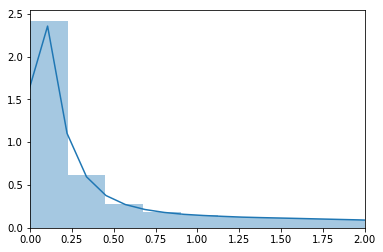

In [5]:
# g
hsc = Table.read("/home/yufeng/projects/rrg-kyi/yufeng/image_classification/data/newHSC/124899.fits").to_pandas()
hsc = hsc[['object_id', 'g_ra', 'g_dec', 'g_cmodel_mag', 'g_deblend_psfmag', 'g_extendedness_value']]
hsc = hsc.rename(columns={'g_ra': 'ra', 'g_dec': 'dec'})
plt_cat = hsc[['g_cmodel_mag', 'g_deblend_psfmag', 'g_extendedness_value']].dropna()
galaxy = plt_cat[plt_cat['g_extendedness_value'] == 1]
ps = plt_cat[plt_cat['g_extendedness_value'] == 0]
plt.clf()
sns.distplot(abs(ps['g_cmodel_mag']-ps['g_deblend_psfmag']))
plt.xlim(0, 2)

(0, 2)

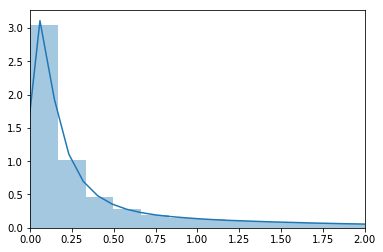

In [6]:
# i
hsc = Table.read("/home/yufeng/projects/rrg-kyi/yufeng/image_classification/data/newHSC/124900.fits").to_pandas()
hsc = hsc[['object_id', 'i_ra', 'i_dec', 'i_cmodel_mag', 'i_deblend_psfmag', 'i_extendedness_value']]
hsc = hsc.rename(columns={'i_ra': 'ra', 'i_dec': 'dec'})
plt_cat = hsc[['i_cmodel_mag', 'i_deblend_psfmag', 'i_extendedness_value']].dropna()
galaxy = plt_cat[plt_cat['i_extendedness_value'] == 1]
ps = plt_cat[plt_cat['i_extendedness_value'] == 0]
plt.clf()
sns.distplot(abs(ps['i_cmodel_mag']-ps['i_deblend_psfmag']))
plt.xlim(0, 2)

In [8]:
abs(ps['i_cmodel_mag']-ps['i_deblend_psfmag'])

0           0.000000
1           0.000000
2           0.000000
3           0.000000
4           0.000000
              ...   
32818309    1.453293
32818318    0.578756
32818342    1.267082
32818350    0.318230
32818370    0.003368
Length: 2326752, dtype: float32

# 1. read an clean the raw data

In [60]:
hsc_meas = Table.read("/home/yufeng/projects/rrg-kyi/yufeng/image_classification/data/newHSC/hscmeas.fits").to_pandas()
hsc_meas = hsc_meas[['object_id', 'r_ra', 'r_dec', 'r_cmodel_mag', 'r_deblend_psfmag', 'r_extendedness_value']]
hsc_meas = hsc_meas.rename(columns={'r_ra': 'ra', 'r_dec': 'dec'})
indexNames = hsc_meas[ (hsc_meas['dec'] < -28.18982478) | (hsc_meas['dec'] > 68.89301978) ].index
hsc_meas.drop(indexNames, inplace=True)
hsc_meas['index_hsc'] = hsc_meas.index.values.tolist()
# hsc meas total: 32818438 objects, all in cfis footprint

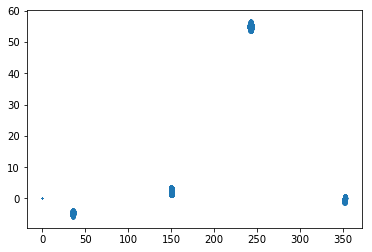

In [36]:
tmp = hsc_meas[['ra', 'dec']].dropna()
plt.scatter(tmp['ra'], tmp['dec'], s=0.03)
plt.show()

In [43]:
plt_cat = hsc_meas[['r_cmodel_mag', 'r_deblend_psfmag', 'r_extendedness_value']].dropna()
galaxy = plt_cat[plt_cat['r_extendedness_value'] == 1]
ps = plt_cat[plt_cat['r_extendedness_value'] == 0]

(0, 2)

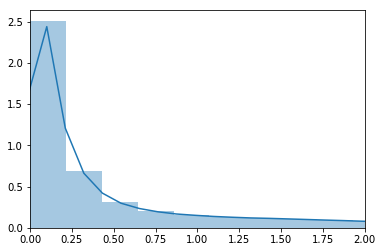

In [55]:
plt.clf()
sns.distplot(abs(ps['r_cmodel_mag']-ps['r_deblend_psfmag']))
plt.xlim(0, 2)

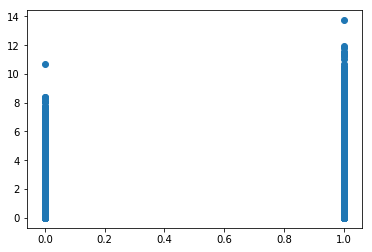

In [27]:
plt_cat = hsc_meas[['r_cmodel_mag', 'r_deblend_psfmag', 'r_extendedness_value']].dropna()
y = abs(plt_cat['r_cmodel_mag']-plt_cat['r_deblend_psfmag'])
x = plt_cat['r_extendedness_value']
plt.scatter(x, y)

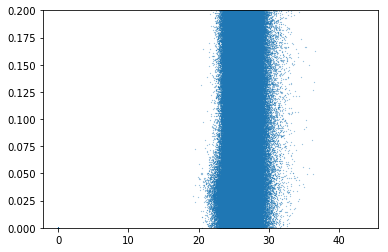

In [17]:
plt_cat = hsc_meas[['r_cmodel_mag', 'r_deblend_psfmag', 'r_extendedness_value']].dropna()
y = abs(plt_cat['r_cmodel_mag']-plt_cat['r_deblend_psfmag'])
x = plt_cat['r_cmodel_mag']
plt.scatter(x, y, s=0.03)
plt.ylim(0,0.2)
plt.show()

(array([1.1429717e+07, 1.2609460e+06, 2.4753100e+05, 9.1325000e+04,
        1.0016000e+04, 8.8200000e+02, 1.3200000e+02, 2.0000000e+01,
        8.0000000e+00, 1.0000000e+00]),
 array([ 0.       ,  1.372379 ,  2.744758 ,  4.117137 ,  5.489516 ,
         6.8618946,  8.234274 ,  9.606652 , 10.979032 , 12.35141  ,
        13.723789 ], dtype=float32),
 <a list of 10 Patch objects>)

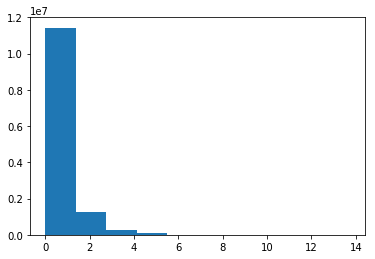

In [34]:
plt.hist(y[np.isfinite(y)].values)

In [9]:
plt_cat

,r_cmodel_mag,r_deblend_psfmag,r_extendedness_value
249,24.002357,25.007004,1.0
256,24.239845,26.239975,1.0
268,24.710247,25.990158,1.0
271,23.704966,25.282097,1.0
273,24.183685,26.047192,1.0
274,25.514526,25.591684,0.0
275,24.921280,25.830879,1.0
276,24.806801,26.650330,1.0
279,24.889938,25.229860,1.0
1332,24.321728,27.111759,1.0


In [10]:
hsc_meas.head()

,object_id,ra,dec,r_cmodel_mag,r_deblend_psfmag,r_extendedness_value,index_hsc
0,36424655564701697,35.196141,-5.859030,NaN,NaN,NaN,0
1,36424655564701699,35.193129,-5.854682,NaN,NaN,NaN,1
2,36424655564701700,35.178514,-5.857883,21.470358,NaN,NaN,2
3,36424655564701701,35.182197,-5.858021,24.937550,NaN,NaN,3
4,36424655564701702,35.197719,-5.857964,25.265812,NaN,1.0,4


find cfis footprint

In [20]:
luau = Table.read("/home/yufeng/projects/rrg-kyi/yufeng/image_classification/data/stra/Luau_DR2.fits").to_pandas()
luau.min()

RA        0.000011
Dec     -28.187047
u         0.050000
du        0.001000
clas     -9.000000
nu        1.000000
u0     -450.426727
Av        0.006099
dtype: float64

In [21]:
luau.max() # dec ( -28.18982478, 68.89301978) add 10 arcsec, 0.00277778

RA      360.000000
Dec      68.890242
u        30.000000
du        5.000000
clas      1.000000
nu       99.000000
u0       29.979115
Av      306.374176
dtype: float64

for catalogue in  Milliquas, SDSS, GAIA:

       add_column P_QSO(catalogue), P_STAR(catalogue), P_GALAXY(catalogue)

# 2.     x-match with milliquas, sdss, gaia

### A. Milliquas

In [23]:
filename = "/home/yufeng/projects/rrg-kyi/yufeng/image_classification/data/milliquas/allmillq_1.22.csv"
milliquas = pd.read_csv(filename).dropna()
milliquas = milliquas[['RA', 'DEC', 'QSO_PROB']]
milliquas = milliquas.rename(columns={'RA': 'ra', 'DEC': 'dec', 'QSO_PROB': 'prob_qso_milliquas'})
milliquas['prob_qso_milliquas'] = milliquas['prob_qso_milliquas']/100
indexNames = milliquas[ (milliquas['dec'] < -28.18982478) | (milliquas['dec'] > 68.89301978) ].index
milliquas.drop(indexNames, inplace=True) 
# milliquas total after dropping: 1756668 objects
# index in original milliquas
milliquas['index_milliquas'] = milliquas.index.values.tolist()
# x-match
hsc_milliquas = cross_match(hsc_meas, milliquas)
# matched:19790        unmatched: 1736878
hsc_milliquas = hsc_milliquas.iloc[:,
                                [3, 4, 6, 7, 8, 9, 10, 11, 12]]
# drop matched ones in hsc, then append matched ones of milliquas to hsc
hsc_meas = hsc_meas.drop(hsc_milliquas['index_hsc'])
hsc_milliquas.index = hsc_milliquas['index_hsc']
hsc_meas = hsc_meas.append(hsc_milliquas)
# append unmatched ones of gaia to cfis
unmatch_milliquas = milliquas.drop(hsc_milliquas['index_milliquas'])
hsc_meas = hsc_meas.append(unmatch_milliquas)
# reset index and save
hsc_meas.reset_index(drop=True, inplace = True)
hsc_meas['index_hsc'] = hsc_meas.index.values.tolist()
hsc_meas['prob_star_milliquas'] = 0
hsc_meas['prob_galaxy_milliquas'] = 0
hsc_meas.to_hdf('/home/yufeng/projects/rrg-kyi/yufeng/image_classification/data/newHSC/hsc_milliquas.h5', 
                                 key='hsc_milliquas', mode='w')

cross...
end
concat...


In [26]:
hsc_meas.head()

,dec,index_hsc,index_milliquas,object_id,prob_qso_milliquas,r_cmodel_mag,r_deblend_psfmag,r_extendedness_value,ra,prob_star_milliquas,prob_galaxy_milliquas
0,-5.859030,0,NaN,3.642466e+16,NaN,NaN,NaN,NaN,35.196141,0,0
1,-5.854682,1,NaN,3.642466e+16,NaN,NaN,NaN,NaN,35.193129,0,0
2,-5.857883,2,NaN,3.642466e+16,NaN,21.470358,NaN,NaN,35.178514,0,0
3,-5.858021,3,NaN,3.642466e+16,NaN,24.937550,NaN,NaN,35.182197,0,0
4,-5.857964,4,NaN,3.642466e+16,NaN,25.265812,NaN,1.0,35.197719,0,0


### B. SDSS

In [2]:
filename = '/home/yufeng/projects/rrg-kyi/yufeng/image_classification/data/sdss/sdss_yufengzhu.csv'
sdss = pd.read_csv(filename).dropna()
sdss['prob_qso_sdss'] = np.where(sdss['class']=='QSO', 1, 0)
sdss['prob_galaxy_sdss'] = np.where(sdss['class']=='GALAXY', 1, 0)
sdss['prob_star_sdss'] = np.where(sdss['class']=='STAR', 1, 0)
sdss = sdss.drop(columns=['class'])
indexNames = sdss[ (sdss['dec'] < -28.18982478) | (sdss['dec'] > 68.89301978) ].index
sdss.drop(indexNames , inplace=True)
sdss['index_sdss'] = sdss.index.values.tolist()
# total: 4265990 within hsc footprint
hsc_milliquas = pd.read_hdf('/home/yufeng/projects/rrg-kyi/yufeng/image_classification/data/newHSC/hsc_milliquas.h5'
                            , 'hsc_milliquas')
matched_sdss = cross_match(hsc_milliquas, sdss)
# matched: 557317       unmatched: 3708673
matched_sdss = matched_sdss.iloc[:,
                                [3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]]
# drop matched ones in hsc, then append matched ones of sdss to hsc
hsc_milliquas = hsc_milliquas.drop(matched_sdss['index_hsc'])
matched_sdss.index = matched_sdss['index_hsc']
hsc_milliquas = hsc_milliquas.append(matched_sdss)
# append unmatched ones of sdss to cfis
unmatch_sdss = sdss.drop(matched_sdss['index_sdss'])
hsc_milliquas = hsc_milliquas.append(unmatch_sdss)
# reset index and save
hsc_milliquas.reset_index(drop=True, inplace = True)
hsc_milliquas['index_hsc'] = hsc_milliquas.index.values.tolist()
hsc_milliquas.to_hdf('/home/yufeng/projects/rrg-kyi/yufeng/image_classification/data/newHSC/hsc_milliquas_sdss.h5', 
                                 key='hsc_milliquas_sdss', mode='w')

In [6]:
hsc_milliquas.head()

,dec,index_hsc,index_milliquas,index_sdss,object_id,prob_galaxy_milliquas,prob_galaxy_sdss,prob_qso_milliquas,prob_qso_sdss,prob_star_milliquas,prob_star_sdss,r_cmodel_mag,r_deblend_psfmag,r_extendedness_value,ra
0,-5.859030,0,NaN,NaN,3.642466e+16,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,35.196141
1,-5.854682,1,NaN,NaN,3.642466e+16,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,35.193129
2,-5.857883,2,NaN,NaN,3.642466e+16,0.0,NaN,NaN,NaN,0.0,NaN,21.470358,NaN,NaN,35.178514
3,-5.858021,3,NaN,NaN,3.642466e+16,0.0,NaN,NaN,NaN,0.0,NaN,24.937550,NaN,NaN,35.182197
4,-5.857964,4,NaN,NaN,3.642466e+16,0.0,NaN,NaN,NaN,0.0,NaN,25.265812,NaN,1.0,35.197719


### C. Gaia

In [7]:
gaia = pd.read_table("/home/yufeng/projects/rrg-kyi/yufeng/image_classification/data/gaia/gdr2ext.dat", sep="\s+", header=None)
gaia = gaia[[3, 4, 1, 2]]
gaia = gaia.rename(columns={3: 'ra', 4: 'dec', 1: 'prob_qso_gaia', 2: 'prob_galaxy_gaia'}).dropna()
gaia['prob_star_gaia'] = 1 - gaia['prob_qso_gaia'] - gaia['prob_galaxy_gaia']
indexNames = gaia[ (gaia['dec'] < -28.18982478) | (gaia['dec'] > 68.89301978) ].index
gaia.drop(indexNames , inplace=True)
gaia['index_gaia'] = gaia.index.values.tolist()
# total: 1735926 within cfis footprint
hsc_milliquas_sdss = pd.read_hdf('/home/yufeng/projects/rrg-kyi/yufeng/image_classification/data/newHSC/hsc_milliquas_sdss.h5'
                            , 'hsc_milliquas_sdss')
matched_gaia = cross_match(hsc_milliquas_sdss, gaia)
# matched: 648582       unmatched:  1087344
matched_gaia = matched_gaia.iloc[:,
                               [3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,  22]]
# drop matched ones in hsc, then append matched ones of sdss to hsc
hsc_milliquas_sdss = hsc_milliquas_sdss.drop(matched_gaia['index_hsc'])
matched_gaia.index = matched_gaia['index_hsc']
hsc_milliquas_sdss = hsc_milliquas_sdss.append(matched_gaia)
# append unmatched ones of sdss to cfis
unmatch_gaia = gaia.drop(matched_gaia['index_gaia'])
hsc_milliquas_sdss = hsc_milliquas_sdss.append(unmatch_gaia)
# reset index and save
hsc_milliquas_sdss.reset_index(drop=True, inplace = True)
hsc_milliquas_sdss['index_hsc'] = hsc_milliquas_sdss.index.values.tolist()
hsc_milliquas_sdss.to_hdf('/home/yufeng/projects/rrg-kyi/yufeng/image_classification/data/newHSC/hsc_milliquas_sdss_gaia.h5', 
                                 key='hsc_milliquas_sdss_gaia', mode='w')

cross...
end
concat...


In [13]:
hsc_milliquas_sdss.head() # 39440813 total

,dec,index_gaia,index_hsc,index_milliquas,index_sdss,object_id,prob_galaxy_gaia,prob_galaxy_milliquas,prob_galaxy_sdss,prob_qso_gaia,prob_qso_milliquas,prob_qso_sdss,prob_star_gaia,prob_star_milliquas,prob_star_sdss,r_cmodel_mag,r_deblend_psfmag,r_extendedness_value,ra
0,-5.859030,NaN,0,NaN,NaN,3.642466e+16,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,35.196141
1,-5.854682,NaN,1,NaN,NaN,3.642466e+16,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,35.193129
2,-5.857883,NaN,2,NaN,NaN,3.642466e+16,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,21.470358,NaN,NaN,35.178514
3,-5.858021,NaN,3,NaN,NaN,3.642466e+16,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,24.937550,NaN,NaN,35.182197
4,-5.857964,NaN,4,NaN,NaN,3.642466e+16,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,25.265812,NaN,1.0,35.197719


# make a final catologue

In [6]:
hsc_milliquas_sdss_gaia = pd.read_hdf('/home/yufeng/projects/rrg-kyi/yufeng/image_classification/data/newHSC/hsc_milliquas_sdss_gaia.h5'
                            , 'hsc_milliquas_sdss_gaia')
hsc_milliquas_sdss_gaia['prob_galaxy_gaia'] = hsc_milliquas_sdss_gaia['prob_galaxy_gaia'].fillna(0)
hsc_milliquas_sdss_gaia['prob_qso_gaia'] = hsc_milliquas_sdss_gaia['prob_qso_gaia'].fillna(0)
hsc_milliquas_sdss_gaia['prob_star_gaia'] = hsc_milliquas_sdss_gaia['prob_star_gaia'].fillna(0)
hsc_milliquas_sdss_gaia['prob_galaxy_sdss'] = hsc_milliquas_sdss_gaia['prob_galaxy_sdss'].fillna(0)
hsc_milliquas_sdss_gaia['prob_qso_sdss'] = hsc_milliquas_sdss_gaia['prob_qso_sdss'].fillna(0)
hsc_milliquas_sdss_gaia['prob_star_sdss'] = hsc_milliquas_sdss_gaia['prob_star_sdss'].fillna(0)
hsc_milliquas_sdss_gaia['prob_galaxy_milliquas'] = hsc_milliquas_sdss_gaia['prob_galaxy_milliquas'].fillna(0)
hsc_milliquas_sdss_gaia['prob_qso_milliquas'] = hsc_milliquas_sdss_gaia['prob_qso_milliquas'].fillna(0)
hsc_milliquas_sdss_gaia['prob_star_milliquas'] = hsc_milliquas_sdss_gaia['prob_star_milliquas'].fillna(0)
hsc_milliquas_sdss_gaia['r_extendedness_value'] = hsc_milliquas_sdss_gaia['r_extendedness_value'].fillna(-1)

In [16]:
final_cata = hsc_milliquas_sdss_gaia[['ra', 'dec', 'prob_galaxy_gaia', 'prob_qso_gaia', 'prob_star_gaia',
                                                  'prob_galaxy_sdss', 'prob_qso_sdss', 'prob_star_sdss',
                                                  'prob_galaxy_milliquas', 'prob_qso_milliquas', 'prob_star_milliquas','r_extendedness_value']]

p_qso = p_qso_mq exists and p_qso_mq > 0.5
        if not, mean(non-zero qso)

p_galaxy = mean(non-zero galaxy)

p_star =mean(non-zero prob in gaia + other non-zero prob

In [17]:
# qso
final_cata['qso_prob'] = 0
final_cata.loc[final_cata['prob_qso_milliquas'] > 0.5, 'qso_prob'] = final_cata['prob_qso_milliquas']
final_cata.loc[ (final_cata['prob_qso_milliquas'] == 0) & (final_cata['prob_qso_gaia'] != 0) & (final_cata['prob_qso_sdss'] != 0), 
               'qso_prob'] = (final_cata['prob_qso_gaia'] + final_cata['prob_qso_sdss'])/2
final_cata.loc[ (final_cata['prob_qso_milliquas'] == 0) & (final_cata['prob_qso_gaia'] != 0) & (final_cata['prob_qso_sdss'] == 0), 
               'qso_prob'] = final_cata['prob_qso_gaia']
final_cata.loc[ (final_cata['prob_qso_milliquas'] == 0) & (final_cata['prob_qso_gaia'] == 0) & (final_cata['prob_qso_sdss'] != 0), 
               'qso_prob'] = final_cata['prob_qso_sdss']
final_cata.loc[ (final_cata['prob_qso_milliquas'] > 0) & (final_cata['prob_qso_milliquas'] < 0.5) & (final_cata['prob_qso_gaia'] == 0) & (final_cata['prob_qso_sdss'] != 0), 
               'qso_prob'] = (final_cata['prob_qso_sdss'] + final_cata['prob_qso_milliquas'])/2
final_cata.loc[ (final_cata['prob_qso_milliquas'] > 0) & (final_cata['prob_qso_milliquas'] < 0.5) & (final_cata['prob_qso_gaia'] != 0) & (final_cata['prob_qso_sdss'] == 0), 
               'qso_prob'] = (final_cata['prob_qso_gaia'] + final_cata['prob_qso_milliquas'])/2
final_cata.loc[ (final_cata['prob_qso_milliquas'] > 0) & (final_cata['prob_qso_milliquas'] < 0.5) & (final_cata['prob_qso_gaia'] == 0) & (final_cata['prob_qso_sdss'] == 0), 
               'qso_prob'] = final_cata['prob_qso_milliquas']

/home/yufeng/jupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
# galaxy
final_cata['galaxy_prob'] = 0
final_cata.loc[(final_cata['prob_galaxy_sdss'] != 0) & (final_cata['prob_galaxy_gaia'] == 0), 
               'galaxy_prob'] = final_cata['prob_galaxy_sdss']
final_cata.loc[(final_cata['prob_galaxy_sdss'] == 0) & (final_cata['prob_galaxy_gaia'] != 0), 
               'galaxy_prob'] = final_cata['prob_galaxy_gaia']
final_cata.loc[(final_cata['prob_galaxy_sdss'] != 0) & (final_cata['prob_galaxy_gaia'] != 0), 
               'galaxy_prob'] = (final_cata['prob_galaxy_gaia'] + final_cata['prob_galaxy_sdss'])/2

/home/yufeng/jupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
# star
final_cata['star_prob'] = 0
final_cata.loc[(final_cata['prob_star_sdss'] != 0) & (final_cata['prob_star_gaia'] == 0), 
               'star_prob'] = final_cata['prob_star_sdss']
final_cata.loc[(final_cata['prob_star_sdss'] == 0) & (final_cata['prob_star_gaia'] != 0), 
               'star_prob'] = final_cata['prob_star_gaia']
final_cata.loc[(final_cata['prob_star_sdss'] != 0) & (final_cata['prob_star_gaia'] != 0), 
               'star_prob'] = (final_cata['prob_star_gaia'] + final_cata['prob_star_sdss'])/2

/home/yufeng/jupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
# save
final_cata.to_hdf('/home/yufeng/projects/rrg-kyi/yufeng/image_classification/data/newHSC/final.h5', 
                                 key='final', mode='w')